In [ ]:
from google.colab import drive
!pip install ultralytics
import os
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.5/756.5 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# prompt: connect to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import locale
print(locale.getpreferredencoding())

import locale
def getpreferredencoding(do_setlocale = True):
 return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

100%|██████████| 49.7M/49.7M [00:00<00:00, 248MB/s]


In [ ]:
import os
def count_files_in_folder(folder_path):
    # Check if the given path is a directory
    if not os.path.isdir(folder_path):
        print("The given path is not a directory.")
        return
    # List all files in the directory
    files = os.listdir(folder_path)
    # Count the number of files
    num_files = len(files)
    return num_files

# Example usage
folder_path1 = "/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/train/images"
folder_path2 = "/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/valid/images"
folder_path3 = "/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/test/images"
num_files1 = count_files_in_folder(folder_path1)
num_files2 = count_files_in_folder(folder_path2)
num_files3 = count_files_in_folder(folder_path3)
print(num_files1,"  ", num_files2,"  ", num_files3, "    ",(num_files1+num_files2+num_files3))

991    288    136      1415


## ***Training***

In [ ]:
##congestion model training
results = model.train(data='/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/data.yaml',
                      epochs=250,batch=16,imgsz=640, plots=True)

Ultralytics YOLOv8.2.7 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/data.yaml, epochs=150, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 117MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Traffic.v5i.yolov8 NEW/train/labels.cache... 991 images, 0 backgrounds, 0 corrupt: 100%|██████████| 991/991 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Traffic.v5i.yolov8 NEW/valid/labels.cache... 288 images, 0 backgrounds, 0 corrupt: 100%|██████████| 288/288 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      12.9G       1.19      1.597      1.138        569        640: 100%|██████████| 31/31 [00:44<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]

                   all        288       3387     0.0514      0.565     0.0509      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      12.8G      1.046     0.6144      1.062        609        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        288       3387      0.501      0.517      0.404      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150        13G      1.029     0.5966      1.057        612        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        288       3387      0.661      0.574      0.597      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      13.5G      1.012     0.5831      1.061        634        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        288       3387      0.692      0.597      0.599      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      12.9G     0.9909     0.5664      1.044        482        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        288       3387      0.556      0.582       0.57      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      12.9G      0.979     0.5443       1.04        697        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        288       3387      0.705      0.728      0.729      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      12.9G     0.9693     0.5283      1.032        585        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387      0.723      0.683      0.716      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      13.2G     0.9571     0.5213      1.033        846        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.782      0.721      0.771      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      12.9G     0.9369     0.5093      1.027        585        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        288       3387      0.728      0.698      0.732      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150        13G     0.9335     0.5021      1.019        729        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        288       3387      0.739      0.703      0.742      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      12.9G     0.9106     0.4995       1.01        721        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        288       3387      0.766      0.761      0.767      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150        13G     0.9199     0.4935      1.018        536        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.809       0.76      0.793        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      12.7G     0.8995       0.48      1.004        812        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.817      0.756      0.786      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      12.6G      0.877     0.4687     0.9926        694        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.791      0.792      0.807      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150        13G     0.8828     0.4689      0.993        672        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        288       3387       0.78      0.798      0.794      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      12.9G     0.8809     0.4706     0.9942        680        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387      0.739      0.781      0.789      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      13.5G     0.8668     0.4674     0.9846        733        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.811      0.747      0.792      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150        13G     0.8518     0.4571     0.9744        782        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.827       0.74      0.783      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      12.7G     0.8412     0.4477      0.975        667        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387       0.82       0.76      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      12.7G     0.8364     0.4488     0.9721        623        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.836      0.757      0.823      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      12.9G     0.8254     0.4388     0.9647        796        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        288       3387      0.804      0.758      0.812      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      12.8G     0.8423     0.4441     0.9795        819        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.826       0.76      0.816      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150        13G     0.8326     0.4391     0.9805        894        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.819      0.726      0.802      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      12.8G     0.8143     0.4269     0.9729        577        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.838      0.767      0.813      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      12.7G     0.8198     0.4287     0.9707        585        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387      0.808       0.78      0.825      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      12.8G     0.8092     0.4187     0.9688        730        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.768       0.77      0.803      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      12.9G     0.7981     0.4138     0.9603        734        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.834       0.78      0.829      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      12.6G     0.7938     0.4176     0.9608        669        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387      0.835      0.796      0.839       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      12.7G     0.7828      0.412      0.952        526        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.843       0.77       0.84      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      12.9G     0.7852     0.4092     0.9492        700        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.802        0.8      0.829      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      12.9G     0.7644     0.4036      0.947        676        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.789      0.797       0.82      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      12.9G     0.7655     0.3988     0.9508        781        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.828       0.81      0.839      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      12.7G     0.7654     0.3952     0.9484        742        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        288       3387      0.859      0.755      0.832      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      12.8G     0.7712     0.4057      0.946        644        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.808      0.821      0.837      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      12.9G     0.7528     0.3965     0.9412        612        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.804      0.808      0.833      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      12.6G     0.7482     0.3955      0.934        699        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.791      0.755       0.81      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      13.2G     0.7461     0.3904     0.9349        823        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387       0.83       0.79      0.831      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      12.9G     0.7475     0.3898     0.9339        651        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.839      0.754      0.807      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      12.7G     0.7441     0.3895     0.9355        655        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.821      0.795      0.841      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      12.6G     0.7347     0.3883     0.9316        590        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.835      0.791      0.847      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      12.9G     0.7384     0.3831     0.9274        596        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.795       0.84      0.831      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      12.6G     0.7209     0.3763     0.9268        786        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.829      0.788      0.827      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      12.8G     0.7202      0.373     0.9214        571        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.798      0.809       0.83      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      12.9G     0.7192     0.3751     0.9268        944        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.821      0.826      0.838      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      12.6G     0.7186     0.3726     0.9257        691        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.814      0.816      0.836      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      12.9G      0.709     0.3713     0.9243        552        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.813      0.829      0.827      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      12.7G     0.6994      0.367     0.9213        622        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387       0.83      0.781      0.832      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      12.8G      0.695     0.3681      0.917        609        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.832      0.784      0.844      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      12.6G       0.69     0.3628     0.9186        783        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.839      0.783      0.822      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      12.9G      0.681     0.3564     0.9153        797        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.839      0.797      0.837      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      13.4G      0.691     0.3598     0.9148        640        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.822      0.805      0.838      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      12.8G     0.7063     0.3639     0.9159        735        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.818      0.772      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      12.9G     0.6808     0.3545     0.9112        847        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.799      0.783      0.824      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      12.6G     0.6698     0.3485     0.9109        592        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.851      0.799      0.831      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      12.8G     0.6637     0.3469      0.904        652        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        288       3387      0.824      0.817      0.831       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      12.7G     0.6716     0.3508     0.9037        810        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.799      0.823      0.845      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      12.8G     0.6728     0.3495      0.912        740        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.799      0.798      0.819      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150        13G     0.6694     0.3492     0.9072        692        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.816        0.8      0.829      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150        13G      0.665     0.3478      0.906        807        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.849      0.784      0.846      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      12.7G     0.6653     0.3482     0.9136        663        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.807      0.796      0.833      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      12.9G     0.6541     0.3419     0.9071        695        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.825      0.799      0.836      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      12.8G     0.6515     0.3393     0.9025        643        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.836      0.767      0.823      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      12.9G     0.6529     0.3406     0.9015        754        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.822      0.789      0.825       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150        13G      0.649      0.342     0.8968        601        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.824      0.775      0.832      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      12.7G     0.6381      0.335     0.9027        682        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.805      0.802      0.826      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      13.4G     0.6386     0.3369     0.9022        759        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.862        0.8      0.841      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      13.2G     0.6222     0.3275     0.8928        558        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.844        0.8      0.846      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150        13G     0.6291     0.3296     0.8943        773        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        288       3387      0.808      0.805      0.826      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      13.4G     0.6269     0.3279      0.897        624        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387      0.802      0.813      0.826      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      12.9G     0.6245     0.3259     0.8908        934        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        288       3387      0.821      0.796      0.826      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      12.9G     0.6129      0.322     0.8857        655        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387       0.83      0.772      0.821      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150        13G     0.6232     0.3295     0.8898        676        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387       0.81      0.824      0.836      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      12.7G     0.6167     0.3266     0.8937        581        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.792       0.81      0.827      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      13.2G     0.6212     0.3258     0.8891        707        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387       0.85      0.778      0.846      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      12.9G     0.6102     0.3194     0.8859        729        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.832      0.806      0.836      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      12.7G     0.6069     0.3203     0.8821        830        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        288       3387      0.829      0.802      0.845      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      12.7G     0.5962     0.3115      0.887        611        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.831      0.804      0.833      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      12.7G     0.6056     0.3199     0.8799        683        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        288       3387      0.831      0.815      0.853      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      13.4G     0.6056     0.3153     0.8828        534        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.832      0.798      0.853      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150        13G     0.5982     0.3132     0.8833        688        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.833      0.804      0.854      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150        13G     0.5974     0.3137     0.8769        800        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387       0.82      0.809      0.841      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      12.9G     0.5852     0.3099     0.8811        634        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387       0.83       0.79      0.839      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      12.8G     0.5831     0.3051     0.8811        514        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.796      0.811      0.841      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      12.8G     0.5859     0.3072     0.8749        677        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387      0.796      0.824      0.842      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      12.8G     0.5829     0.3073     0.8754        738        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387       0.79      0.809      0.815      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      13.3G     0.5839     0.3081     0.8763        628        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.807      0.818      0.838       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150        13G     0.5734     0.3012     0.8734        817        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.819      0.812      0.841      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      12.9G     0.5714     0.3003     0.8688        665        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.817      0.842      0.846      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      13.1G     0.5728     0.2997     0.8726        756        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.837      0.807      0.851       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      13.3G     0.5749     0.3036     0.8747        554        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.827      0.807      0.839      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      13.3G      0.557     0.2926      0.867        658        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.815      0.802      0.841      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      12.9G     0.5572     0.2938     0.8696        663        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.834        0.8      0.836      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      12.7G     0.5671      0.296     0.8703        729        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.802      0.787      0.817       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      12.8G     0.5617     0.2954      0.866        680        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.824      0.822      0.836      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      12.9G     0.5473     0.2874     0.8624        688        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.818      0.804       0.83      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150        13G     0.5531     0.2911     0.8634        606        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.828       0.82      0.842      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      12.6G     0.5555     0.2901     0.8671        581        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.776      0.841      0.842      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      12.8G     0.5431     0.2842     0.8647        722        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        288       3387      0.827      0.809      0.831      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      12.9G     0.5497     0.2878     0.8633        624        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.839      0.785      0.836      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      12.9G     0.5381     0.2832     0.8627        644        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387       0.82      0.783      0.841      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      12.9G     0.5358     0.2858     0.8644        696        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.799      0.822      0.848      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      12.9G     0.5311     0.2793     0.8581        826        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.797      0.829      0.835      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      12.9G     0.5368     0.2833       0.86        809        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        288       3387        0.8      0.811      0.831      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      12.9G     0.5357     0.2819     0.8564        657        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.812      0.811      0.828      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      12.9G      0.524     0.2787     0.8583        576        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.837      0.813      0.843      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      12.9G     0.5204     0.2739     0.8567        653        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.834      0.801      0.844      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      12.9G     0.5205     0.2742     0.8576        642        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.803      0.827      0.842      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      12.9G     0.5228     0.2728     0.8556        732        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        288       3387      0.841      0.792      0.846      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      12.9G     0.5136     0.2708     0.8575        759        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        288       3387      0.808       0.82      0.849      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      12.9G     0.5052     0.2693     0.8493        640        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.798      0.843      0.851      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150        13G     0.5118     0.2703     0.8504        702        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.802      0.836      0.848      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      13.5G     0.5058     0.2666     0.8482        560        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.796      0.811      0.835      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      12.9G     0.5017     0.2666     0.8521        679        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.813       0.83      0.864      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      12.8G     0.4996     0.2645     0.8512        833        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.825      0.812      0.855      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      13.2G     0.4947     0.2609     0.8493        752        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387       0.81      0.821       0.84      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      12.9G     0.4894     0.2575     0.8492        597        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387       0.79       0.83      0.832       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150        14G     0.5038      0.267     0.8535        759        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.798      0.835      0.842      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      12.9G     0.4955     0.2625     0.8517        764        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.794      0.821      0.832      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      13.1G     0.4922     0.2577     0.8511        824        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.808      0.807      0.835      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150        13G     0.4748      0.253     0.8494        655        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        288       3387      0.823      0.811       0.84      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      12.6G     0.4855     0.2548     0.8459        572        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.818      0.801      0.831       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      12.9G     0.4814     0.2544     0.8455        646        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.801      0.806      0.831      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      12.6G     0.4838     0.2563     0.8444        726        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.786      0.814      0.828      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      12.6G     0.4765     0.2542     0.8453        549        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.806      0.798      0.831      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      12.9G     0.4684     0.2484     0.8436        621        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        288       3387      0.813      0.796       0.83      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      12.8G     0.4675     0.2501     0.8445        657        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.802      0.829      0.836      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      12.7G     0.4723     0.2525     0.8472        666        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.804      0.834      0.839      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      12.6G     0.4631     0.2501     0.8412        723        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.823      0.808      0.847      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      12.7G     0.4628     0.2459     0.8418        678        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.822      0.808      0.845      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150        13G     0.4619     0.2481     0.8425        776        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.834      0.802      0.845      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      13.4G     0.4615     0.2452     0.8397        609        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.792      0.832      0.833      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150        13G     0.4495     0.2409     0.8379        548        640: 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.814       0.81      0.838       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      12.9G     0.4558     0.2438     0.8395        633        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.831      0.819      0.835      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      12.9G     0.4566     0.2439     0.8385        548        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        288       3387      0.806      0.827      0.837      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      12.8G     0.4523     0.2402     0.8378        794        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.818      0.829      0.836      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      12.9G     0.4473      0.239     0.8359        758        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.813      0.807      0.832       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      12.7G     0.4494     0.2408      0.836        743        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.823      0.812      0.838      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      12.9G     0.4462     0.2379     0.8383        674        640: 100%|██████████| 31/31 [00:19<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387       0.83      0.798      0.829      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      13.5G     0.4423      0.235     0.8395        584        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.828      0.808      0.832      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      13.4G      0.437      0.236     0.8337        736        640: 100%|██████████| 31/31 [00:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.824      0.807      0.831      0.591


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      13.2G     0.4581     0.2357      0.833        477        640: 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        288       3387      0.819      0.797      0.835      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      12.9G     0.4309     0.2221     0.8243        339        640: 100%|██████████| 31/31 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        288       3387      0.789      0.822      0.827      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      12.9G     0.4153     0.2179     0.8191        373        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        288       3387      0.796      0.824      0.832      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      13.3G     0.4098     0.2134     0.8172        500        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        288       3387      0.803      0.807      0.822      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      13.2G     0.4089     0.2146     0.8198        447        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387      0.795      0.823      0.825      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150        13G     0.4103      0.213     0.8192        269        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387       0.81       0.81      0.832      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      12.9G     0.4047     0.2129     0.8182        392        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]

                   all        288       3387      0.802      0.817      0.832      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150        13G     0.3993     0.2089     0.8167        326        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        288       3387      0.815      0.822      0.839       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      12.9G     0.3987     0.2078     0.8183        352        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        288       3387      0.801      0.829      0.835      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      13.3G     0.3943     0.2061     0.8155        284        640: 100%|██████████| 31/31 [00:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        288       3387       0.81      0.823      0.833      0.586



150 epochs completed in 0.963 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.7 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.14s/it]


                   all        288       3387      0.818       0.83      0.864      0.596
                   car        288       3186      0.918      0.943      0.975        0.8
             motorbike        288        201      0.719      0.716      0.753      0.391
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
##accident model training
results = model.train(data="/content/drive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml",  epochs=250,batch=16,imgsz=640, plots=True)

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 115MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Car Crash Detection.v1i.yolov8/train/labels.cache... 633 images, 10 backgrounds, 0 corrupt: 100%|██████████| 643/643 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Car Crash Detection.v1i.yolov8/valid/labels.cache... 181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      7.39G       1.87      2.895      1.864          5        640: 100%|██████████| 41/41 [02:56<00:00,  4.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        181        181      0.299      0.238      0.167     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      7.25G      1.874      2.391      1.927          1        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]


                   all        181        181    0.00162      0.486    0.00129   0.000397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      7.26G      1.971      2.455      2.021          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        181        181   0.000522      0.155   0.000299   9.64e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      7.25G      1.943      2.404      2.013          2        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181    0.00102     0.0276    0.00018   3.09e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      7.38G      1.913      2.342       1.98          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        181        181     0.0084     0.0718    0.00152    0.00045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      7.35G      1.887      2.159       1.94          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        181        181    0.00256      0.619    0.00211   0.000882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      7.34G      1.853      2.211      1.915          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.118      0.116      0.054     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      7.25G      1.826      2.136      1.918          2        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        181        181      0.405      0.265      0.231      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      7.36G      1.756      2.079      1.865          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        181        181      0.261      0.326      0.202        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      7.35G      1.681      1.943      1.811          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        181        181      0.359      0.298      0.239      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      7.34G      1.711      1.949      1.845          2        640: 100%|██████████| 41/41 [00:25<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        181        181      0.607      0.475      0.486      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      7.25G      1.649      1.828      1.805          2        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181      0.441      0.511      0.502      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      7.38G      1.682      1.852      1.804          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        181        181      0.524      0.448      0.481      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      7.34G      1.655      1.794      1.789          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        181        181      0.438      0.475      0.429      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      7.34G       1.64       1.77      1.783          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        181        181      0.546      0.459      0.484      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      7.25G      1.596      1.718      1.761          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        181        181      0.527      0.591      0.595      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      7.36G      1.559      1.606        1.7          7        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        181        181      0.408      0.475      0.431       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      7.36G      1.561      1.536      1.711          7        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        181        181      0.558      0.635      0.625      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      7.34G      1.524      1.502      1.647          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        181        181      0.559      0.343      0.436      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      7.24G      1.509      1.553       1.68          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        181        181      0.545       0.63      0.635      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      7.38G      1.481      1.468      1.636          7        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        181        181      0.618      0.591      0.602      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      7.35G      1.548      1.444      1.695          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        181        181       0.67      0.597      0.676      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      7.34G      1.487      1.425      1.631          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        181        181      0.613      0.635       0.62      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      7.24G      1.476      1.434       1.64          4        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.698      0.624      0.661      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      7.34G       1.52      1.437      1.668          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        181        181      0.527      0.602      0.538       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      7.35G      1.461      1.431      1.587          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]

                   all        181        181      0.682      0.635      0.692       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      7.33G      1.482      1.482      1.649          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        181        181      0.699      0.575      0.667       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      7.25G      1.371      1.301      1.546          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        181        181      0.695      0.691      0.747      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      7.36G      1.462       1.34      1.612          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        181        181      0.686      0.614      0.709      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      7.36G      1.413      1.273      1.596          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        181        181      0.757      0.689      0.723      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      7.35G      1.449      1.312      1.625          2        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        181        181      0.658      0.624      0.719       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      7.25G      1.381      1.268      1.562          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        181        181      0.785      0.669      0.766      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      7.37G      1.377      1.174      1.564          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        181        181      0.747      0.768      0.771      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      7.35G      1.414      1.192      1.566          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        181        181      0.619      0.655      0.635      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      7.36G      1.377      1.233      1.546          8        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.804      0.641      0.764      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      7.24G      1.358      1.188      1.547          2        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        181        181      0.771      0.708      0.795      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      7.37G      1.352       1.09      1.524          6        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        181        181       0.74      0.663      0.727      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      7.36G      1.317      1.163      1.496          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        181        181      0.732       0.79      0.814      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      7.35G      1.341       1.14      1.519          8        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        181        181      0.719      0.664      0.706      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      7.25G      1.341      1.145      1.524          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        181        181      0.824      0.773       0.85      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      7.36G       1.28      1.126      1.482          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        181        181      0.885      0.768      0.871      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      7.34G      1.295      1.091      1.502          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.804      0.613      0.763      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      7.34G      1.266      1.052       1.44          4        640: 100%|██████████| 41/41 [00:24<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        181        181      0.795      0.801      0.865      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      7.25G      1.272      1.033      1.457          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        181        181      0.788      0.829      0.877      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      7.37G      1.297      1.053      1.456          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        181        181      0.663      0.773      0.778      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      7.34G      1.268      1.038      1.472          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        181        181      0.841      0.758      0.843      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      7.34G       1.25     0.9767      1.472          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181       0.85      0.754      0.875      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      7.25G      1.223     0.9819       1.44          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        181        181      0.822      0.751      0.852      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      7.36G      1.261     0.9752      1.453          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        181        181      0.883      0.834      0.894      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      7.34G      1.249      1.039      1.446          8        640: 100%|██████████| 41/41 [00:25<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        181        181      0.858      0.746      0.865      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      7.35G       1.22      0.996      1.457          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        181        181       0.91       0.78      0.889      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      7.25G      1.198     0.9512      1.443          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        181        181      0.864      0.808      0.884      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      7.37G       1.24     0.9694      1.441          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        181        181      0.907      0.762      0.881      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      7.35G      1.253     0.9536      1.434          8        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        181        181      0.869      0.856      0.921      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      7.34G      1.211     0.8832      1.402          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        181        181      0.881      0.807      0.905      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      7.24G      1.167     0.8801      1.383          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        181        181      0.862       0.84      0.907      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      7.37G      1.165     0.8985      1.368          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        181        181      0.886      0.905       0.94      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      7.35G      1.161     0.8847      1.375          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.889      0.818      0.886      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      7.34G      1.174     0.9088        1.4          8        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        181        181      0.892      0.868       0.95      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      7.25G      1.156     0.8465      1.394          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181      0.891      0.859      0.924      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      7.38G      1.119     0.8666      1.357          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        181        181       0.91      0.823      0.913      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      7.34G      1.181     0.9259      1.393          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.908      0.901      0.953       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      7.34G      1.139      0.862       1.36          6        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        181        181      0.875      0.776      0.886      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      7.24G       1.14     0.8588      1.375          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        181        181      0.957      0.855      0.943      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      7.37G      1.164     0.8879      1.397          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        181        181       0.89      0.801      0.908       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      7.35G      1.116     0.8214      1.347          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        181        181      0.932      0.905      0.944      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      7.34G      1.119     0.8432      1.343          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        181        181      0.881      0.862      0.912      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      7.25G      1.129     0.8258      1.351          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.953      0.801      0.922      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      7.37G      1.085     0.7953      1.327          4        640: 100%|██████████| 41/41 [00:24<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        181        181      0.893      0.873      0.923      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      7.35G      1.109     0.8329       1.34          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        181        181      0.884      0.856      0.923      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      7.34G      1.094     0.7885      1.333          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        181        181       0.85      0.876      0.919      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      7.25G      1.077     0.7803      1.312          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        181        181      0.905       0.84      0.941      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      7.37G      1.118     0.7979       1.34          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        181        181      0.899      0.884      0.933      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      7.34G       1.09     0.8321      1.334          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.891       0.84      0.923      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      7.35G      1.129     0.8233      1.355          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        181        181      0.884       0.89      0.938       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      7.24G      1.095      0.803      1.321          4        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        181        181      0.928      0.895      0.945      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      7.37G       1.03     0.6994      1.268          7        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        181        181      0.918      0.895      0.935      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      7.35G      1.004      0.738      1.258          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        181        181      0.889      0.881      0.939      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      7.34G      1.058     0.7468      1.295          1        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        181        181      0.929      0.866       0.94      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      7.24G      1.066     0.7426      1.293          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        181        181      0.884      0.895      0.925      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      7.37G      1.063     0.7463      1.322          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        181        181      0.872      0.901      0.937      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      7.34G       1.11     0.8586      1.344          1        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        181        181      0.907      0.878      0.946      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      7.33G      1.051     0.7702      1.307          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        181        181      0.861      0.884      0.912      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      7.25G      1.036     0.7616      1.277          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        181        181      0.914      0.879      0.933      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      7.37G      1.005      0.697      1.249          7        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.928      0.852       0.94      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      7.35G      1.019     0.7058       1.27          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        181        181       0.93      0.851      0.927      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      7.35G      1.045     0.7314      1.284          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        181        181      0.902       0.92      0.952      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      7.25G      1.006     0.7164      1.253          8        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        181        181      0.952      0.875      0.954      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      7.36G      1.015     0.7044      1.245          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        181        181      0.969      0.862      0.951      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      7.35G      1.047     0.7295       1.32          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        181        181      0.951      0.917      0.949      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      7.35G      1.028     0.6821      1.315          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        181        181      0.906      0.905      0.938      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      7.24G      1.024     0.7106      1.275          2        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        181        181      0.899      0.856      0.918      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      7.38G      1.024     0.7433      1.295          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        181        181      0.942       0.89      0.949      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      7.35G     0.9555     0.6918      1.242          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        181        181      0.909      0.933      0.942      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      7.35G       0.99     0.6661      1.249          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        181        181      0.926      0.867      0.945      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      7.25G     0.9658     0.6807      1.258          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181      0.952       0.89      0.959       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      7.37G     0.9803     0.6921      1.268          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        181        181       0.97      0.879      0.949      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      7.34G     0.9808     0.6718      1.235          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        181        181      0.932       0.89      0.932      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      7.35G     0.9547     0.6495       1.24          1        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        181        181      0.972       0.89      0.941      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      7.24G     0.9639      0.635      1.226          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        181        181      0.954      0.911      0.944      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      7.38G     0.9638     0.6577      1.241          7        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        181        181      0.931      0.884      0.957      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      7.35G     0.9782     0.6512      1.272          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        181        181      0.934      0.878      0.931      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      7.34G      1.005     0.6971      1.263          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        181        181      0.976       0.84       0.94      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      7.24G     0.9401     0.6497      1.245          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.954      0.921      0.955      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      7.38G     0.9291     0.6355      1.203          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        181        181      0.964      0.917       0.96      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      7.35G     0.9593     0.6709      1.268          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        181        181      0.955      0.937      0.962      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      7.34G     0.9775     0.6619      1.251          9        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        181        181      0.909      0.923      0.946      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      7.24G      0.933     0.6194      1.222          1        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        181        181       0.97      0.906      0.952      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      7.37G     0.9436     0.6227      1.231          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.951       0.86      0.929      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      7.35G     0.9107     0.5955      1.188          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        181        181      0.948      0.912      0.958      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      7.34G     0.8992     0.6091      1.194          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        181        181      0.959      0.912      0.962      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      7.24G     0.9294     0.6112      1.215          9        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        181        181      0.935      0.956       0.96      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      7.37G     0.9244     0.6397      1.203          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        181        181       0.91       0.89      0.932      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      7.34G     0.8711     0.5923      1.186          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        181        181      0.968       0.89      0.943      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      7.34G     0.9267      0.631      1.229          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        181        181      0.916      0.906      0.941      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      7.24G     0.9305     0.6164      1.225          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]

                   all        181        181      0.959      0.893      0.964      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      7.37G     0.9342     0.6582      1.238          1        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181      0.982      0.873      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      7.34G     0.9136     0.6282      1.203          8        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        181        181      0.974      0.867      0.952      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      7.35G     0.9011     0.6176      1.191          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        181        181      0.957      0.906      0.951      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      7.25G     0.8634     0.5765      1.175          5        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181      0.977      0.939      0.975      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      7.36G     0.8888     0.6081      1.195          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        181        181      0.926      0.904      0.953      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      7.34G     0.9079     0.6076      1.211          2        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        181        181      0.955      0.932      0.953      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      7.34G      0.898     0.6001      1.208          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        181        181      0.938      0.923      0.967      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      7.24G     0.9067     0.5854      1.194          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        181        181      0.967      0.878      0.948      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      7.38G     0.8509     0.5601      1.153          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        181        181      0.959      0.903      0.964      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      7.34G     0.8915     0.5824      1.178          4        640: 100%|██████████| 41/41 [00:25<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        181        181      0.951      0.906      0.963      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      7.34G     0.8699       0.58      1.196          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        181        181       0.95       0.95      0.967      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      7.25G     0.8405     0.5421      1.143          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        181        181      0.954      0.927       0.96      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      7.37G     0.8758     0.5754      1.168          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        181        181      0.959      0.915      0.946       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      7.35G     0.8759     0.5734      1.164          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181       0.95      0.917      0.951      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      7.34G     0.8259     0.5377      1.157          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        181        181      0.971      0.936      0.967      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      7.24G     0.8604      0.576      1.162          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        181        181      0.948      0.907      0.947      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      7.37G     0.8455     0.6137      1.156          1        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181      0.948      0.898      0.933      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      7.36G     0.8423     0.5667      1.153          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        181        181      0.954      0.945       0.97      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      7.35G     0.8454     0.5604      1.159          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        181        181       0.96      0.919      0.953      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      7.25G     0.8357     0.5424      1.155          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        181        181      0.953      0.945      0.968       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      7.37G      0.864     0.5952      1.186          2        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        181        181      0.961      0.939      0.965      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      7.34G     0.8298     0.5622      1.156          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        181        181       0.96      0.917      0.947      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      7.34G     0.8332     0.5407      1.139          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        181        181      0.974      0.901       0.94      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      7.25G     0.8687     0.5563       1.19          8        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        181        181      0.949      0.925      0.957       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      7.37G     0.8046     0.5207      1.151          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.965      0.921      0.963      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      7.35G     0.8072     0.5335      1.144          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        181        181      0.985       0.89      0.961      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      7.35G     0.8287     0.5468      1.157          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        181        181      0.949      0.912      0.962      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      7.25G     0.8337     0.5496      1.158          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        181        181      0.988      0.912      0.964      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      7.36G      0.861     0.5567      1.159          2        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        181        181      0.971      0.934      0.962      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      7.35G     0.7906     0.5139      1.112          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        181        181      0.962      0.917      0.955      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      7.34G     0.8256     0.5404      1.136          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        181        181      0.963      0.901      0.957      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      7.24G     0.7958     0.5198      1.117          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        181        181      0.927      0.918      0.948       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      7.38G     0.8376     0.5425      1.161          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.977      0.919      0.948      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      7.35G     0.8404     0.5409      1.156          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        181        181      0.975      0.917      0.969      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      7.35G     0.8175      0.527       1.15          8        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.924      0.943      0.965      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      7.25G     0.8061     0.5416      1.151          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        181        181      0.982      0.927      0.965      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      7.38G     0.7654     0.5133      1.106          7        640: 100%|██████████| 41/41 [00:23<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        181        181      0.965      0.912      0.962      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      7.36G     0.8059     0.5197      1.131          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        181        181      0.954      0.907      0.952      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      7.34G     0.7937     0.5241      1.139          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        181        181      0.982      0.915      0.957      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      7.25G     0.7946     0.5228      1.121          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        181        181      0.986      0.917      0.965      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      7.37G     0.7503     0.4841      1.109          6        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        181        181      0.973      0.912       0.96      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      7.35G     0.7656     0.5081      1.116          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        181        181      0.966      0.895      0.942      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      7.35G     0.7995     0.5253      1.122          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        181        181      0.976      0.917      0.958      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      7.25G     0.7981     0.4824      1.118          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        181        181      0.982      0.915      0.962      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      7.38G     0.7422     0.4651      1.087          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        181        181      0.954      0.939      0.961      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      7.35G     0.7681     0.4899      1.105          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        181        181      0.955      0.947      0.965      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      7.35G     0.7803        0.5      1.117          6        640: 100%|██████████| 41/41 [00:24<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        181        181       0.96      0.926      0.962      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      7.25G     0.7609     0.4872      1.088          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        181        181      0.964      0.934      0.957      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      7.36G     0.7644     0.4835      1.131          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        181        181      0.968      0.928      0.958      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      7.36G     0.7395     0.4819      1.073          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        181        181      0.964      0.923      0.956      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      7.34G     0.7366     0.4777      1.094          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        181        181      0.966      0.939      0.966      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      7.24G     0.7491     0.4805      1.094          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.955      0.939      0.954      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      7.37G     0.7446      0.476      1.093          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        181        181      0.977      0.928      0.956      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      7.35G     0.7417     0.4794      1.103          8        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        181        181      0.977      0.917      0.962       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      7.35G     0.7078     0.4631      1.066          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        181        181      0.985      0.917      0.967      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      7.24G     0.7405     0.4859      1.117          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        181        181      0.971      0.917      0.955      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      7.37G     0.7622     0.4839      1.114          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        181        181      0.966      0.912      0.952      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      7.36G     0.7469     0.4759      1.111          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        181        181      0.949      0.927      0.954      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      7.34G     0.7463     0.4902      1.104          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        181        181      0.978      0.917      0.969      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      7.24G     0.7559     0.4939      1.126          3        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        181        181      0.924       0.95      0.968      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      7.36G     0.7103     0.4481      1.081          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        181        181       0.96      0.933      0.966      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      7.34G     0.7071     0.4668      1.083          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        181        181      0.982      0.917      0.965       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      7.34G     0.7008     0.4551      1.082          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        181        181      0.965      0.925      0.962       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      7.25G      0.732     0.4698      1.093          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        181        181      0.982      0.926      0.964      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      7.36G     0.7229     0.4609      1.068          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        181        181      0.963      0.917      0.958      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      7.35G     0.7203     0.4606      1.093          3        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        181        181      0.966      0.949      0.971      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      7.34G      0.742     0.4808      1.103          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        181        181      0.954      0.917      0.955      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      7.24G     0.6948     0.4584      1.077          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        181        181      0.972      0.912      0.959      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      7.36G     0.6929     0.4476      1.066          2        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        181        181      0.961      0.941      0.972      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      7.35G     0.6907     0.4461      1.077          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        181        181      0.971       0.93       0.97      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      7.35G     0.6818     0.4486      1.068          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        181        181      0.964      0.945      0.964       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      7.25G     0.7067      0.447      1.086          5        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        181        181      0.942      0.939      0.971      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      7.37G     0.6902     0.4246      1.059          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.966      0.936       0.96      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      7.35G     0.6901     0.4558      1.066          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        181        181      0.971      0.934      0.961      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      7.35G     0.6933     0.4415      1.074          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        181        181      0.975      0.923      0.961      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      7.25G     0.6712     0.4413      1.044          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        181        181      0.971      0.917       0.96       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      7.37G     0.6929     0.4377      1.073          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        181        181      0.976      0.928      0.957      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      7.35G     0.6987     0.4339      1.084          5        640: 100%|██████████| 41/41 [00:24<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        181        181      0.966      0.928      0.962      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      7.34G     0.6808     0.4403      1.056          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        181        181       0.96      0.921      0.969      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      7.25G     0.7058     0.4325      1.079          8        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        181        181      0.971      0.928      0.952      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      7.38G     0.6807     0.4182      1.081          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        181        181      0.967      0.923      0.955      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      7.34G     0.6696     0.4174       1.04          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.975      0.923      0.955      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      7.35G     0.6649     0.4385      1.048          2        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        181        181      0.967      0.934      0.967      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      7.25G     0.6404     0.4168      1.028          9        640: 100%|██████████| 41/41 [00:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        181        181      0.981      0.939      0.966      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      7.37G     0.6551      0.422      1.056          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        181        181      0.955      0.948      0.964      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      7.34G     0.6673     0.4358      1.067          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        181        181      0.971      0.934      0.957      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      7.33G     0.6643     0.4298      1.069          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        181        181      0.983      0.933      0.961      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      7.24G      0.677     0.4407      1.069          7        640: 100%|██████████| 41/41 [00:22<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        181        181      0.988      0.923      0.957      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      7.37G     0.6545      0.417      1.056          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        181        181      0.976      0.945      0.966      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      7.35G     0.6813     0.4527      1.063          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]

                   all        181        181      0.981      0.945      0.966      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      7.35G      0.657     0.4135      1.058          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        181        181      0.982       0.95      0.957      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      7.24G     0.6489     0.4304      1.048          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        181        181      0.955      0.938      0.953      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      7.37G     0.6544     0.4321      1.049          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        181        181      0.944      0.937       0.96      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      7.33G     0.6591     0.4161      1.046          3        640: 100%|██████████| 41/41 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        181        181      0.958      0.945      0.963      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      7.34G     0.6286     0.4214      1.034          3        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        181        181      0.966       0.93      0.961      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      7.24G     0.6404     0.4127      1.041          4        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        181        181      0.987      0.928      0.965      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      7.37G     0.6416     0.4055      1.049          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        181        181      0.961      0.946      0.959      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      7.34G     0.6635     0.4083      1.042          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        181        181      0.974      0.939      0.961      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      7.34G     0.6374     0.4117      1.035          6        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        181        181      0.988      0.932      0.962      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      7.25G     0.6328     0.4015      1.037          6        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        181        181      0.981      0.939      0.962      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      7.37G     0.6181     0.3777      1.025          5        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        181        181      0.986      0.934       0.96      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      7.35G     0.6436     0.4044      1.039          7        640: 100%|██████████| 41/41 [00:23<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        181        181      0.977      0.934      0.958      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      7.35G     0.6413     0.4012      1.044          4        640: 100%|██████████| 41/41 [00:22<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        181        181      0.961      0.944      0.964      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      7.24G     0.6401     0.4107      1.048          5        640: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        181        181      0.966      0.939      0.959      0.653
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 120, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



220 epochs completed in 1.795 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]


                   all        181        181      0.976      0.939      0.975      0.685
Speed: 0.7ms preprocess, 11.9ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train


## ***Validation***

In [ ]:
!yolo task=detect \
mode=val \
model="/content/runs/detect/train/weights/best.pt" \
data='/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/data.yaml' classes=[0] split=val


Ultralytics YOLOv8.2.7 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Traffic.v5i.yolov8 NEW/valid/labels.cache... 288 images, 0 backgrounds, 0 corrupt: 100% 288/288 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:16<00:00,  1.09it/s]
                   all        288       3186      0.938      0.931      0.975      0.801
                   car        288       3186      0.938      0.931      0.975      0.801
Speed: 0.5ms preprocess, 6.1ms inference, 0.1ms loss, 31.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect \
mode=val \
model="/content/runs/detect/train/weights/best.pt" \
data="/content/drive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml" split=val


Ultralytics YOLOv8.2.7 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Traffic.v5i.yolov8 NEW/test/labels.cache... 136 images, 0 backgrounds, 0 corrupt: 100% 136/136 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:13<00:00,  1.45s/it]
                   all        136       1662      0.936      0.917      0.965      0.795
                   car        136       1662      0.936      0.917      0.965      0.795
Speed: 0.9ms preprocess, 8.0ms inference, 0.0ms loss, 63.6ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
##save all the results
!cp -r "/content/runs/detect/train" "/content/drive/MyDrive/FinalW/congestion"

## **Testing**

In [ ]:
!yolo task=detect \
mode=val \
model='/content/drive/MyDrive/finalW/runs/detect/train/weights/best.pt' \
data='/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/data.yaml' classes=[0] split=test


Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Traffic.v5i.yolov8 NEW/test/labels.cache... 136 images, 0 backgrounds, 0 corrupt: 100% 136/136 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:17<00:00,  1.99s/it]
                   all        136       1662      0.935      0.918      0.965      0.795
                   car        136       1662      0.935      0.918      0.965      0.795
Speed: 3.3ms preprocess, 15.3ms inference, 0.2ms loss, 21.0ms postprocess per image
Results saved to runs/detect/val23
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect \
mode=val \
model="/content/runs/detect/train/weights/best.pt" \
data="/content/drive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml" split=test

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Car Crash Detection.v1i.yolov8/test/labels.cache... 91 images, 10 backgrounds, 0 corrupt: 100% 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:12<00:00,  1.78s/it]
                   all        101         91      0.867       0.93      0.892      0.633
Speed: 2.5ms preprocess, 26.3ms inference, 0.0ms loss, 27.7ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
##save all the results
!cp -r "/content/runs" "/content/drive/MyDrive"

## **Dataset ploting**

In [ ]:
# Construct the path to the best model weights file using os.path.join
best_Con_model_path = os.path.join('/content/drive/MyDrive/finalW/runs/detect/train/weights/best.pt')
# Load the best model weights into the YOLO model
best_Con_model = YOLO(best_Con_model_path)

In [ ]:
best_Acc_model_path = os.path.join('/content/drive/MyDrive/runs/detect/train/weights/best.pt')
best_Acc_model = YOLO(best_Acc_model_path)


0: 384x640 23 cars, 16.0ms
Speed: 2.5ms preprocess, 16.0ms inference, 43.6ms postprocess per image at shape (1, 3, 384, 640)


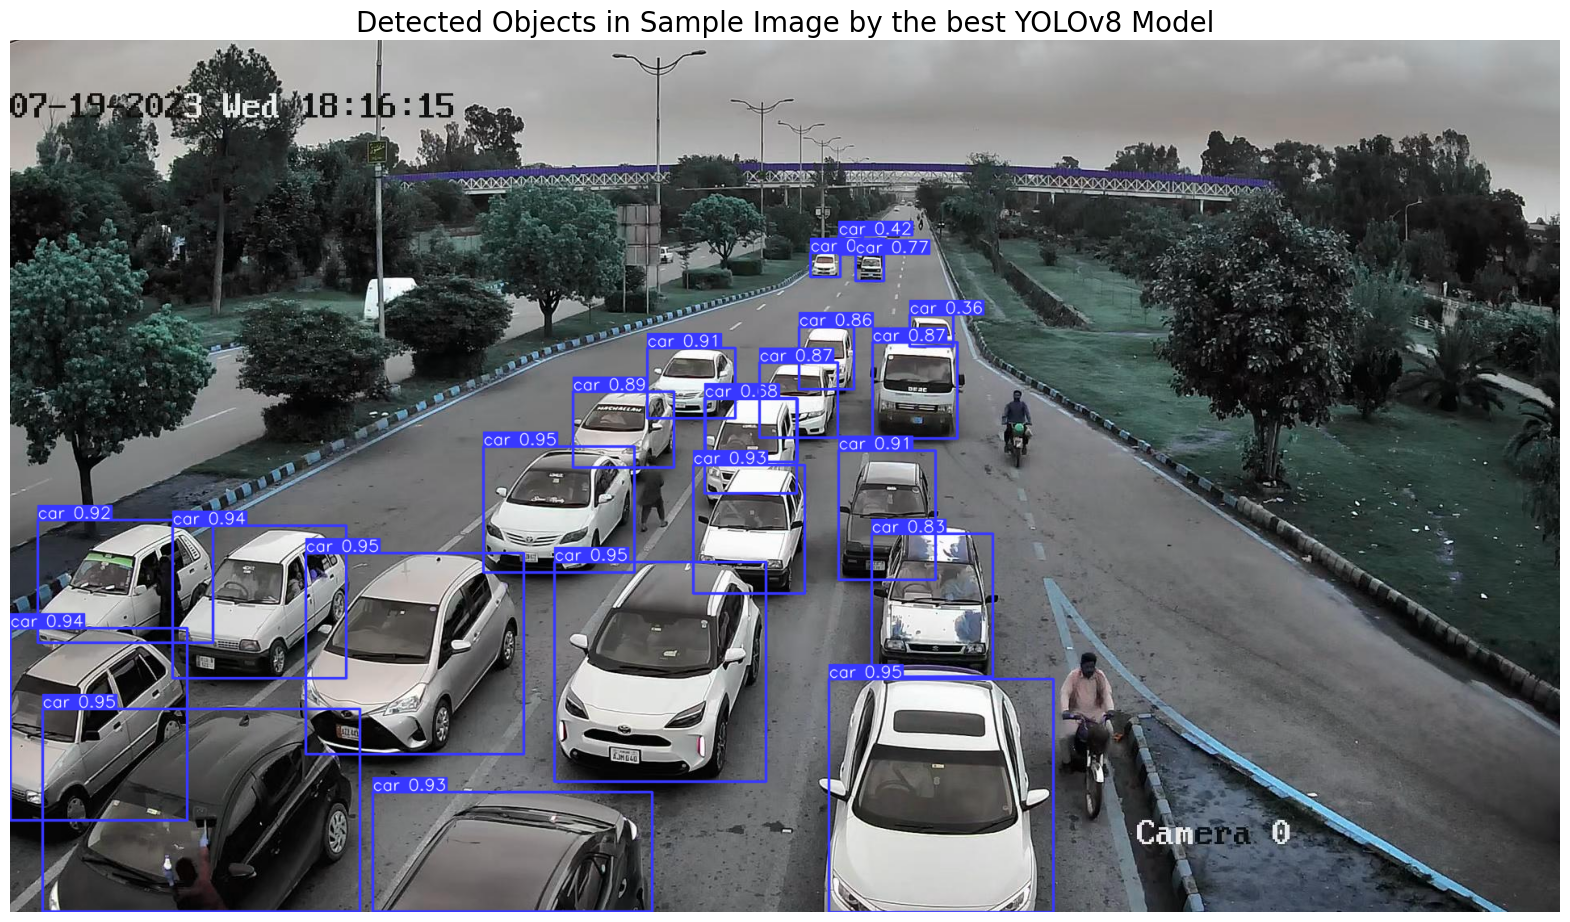

In [ ]:
TestImage = Image.open(open("/content/drive/MyDrive/Traffic.v5i.yolov8 NEW/test/images/img_3742_jpg.rf.87e45bb118a1f7f8dbf3abf74c9a7b1e.jpg", 'rb'))
# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
TestImage = best_Con_model(TestImage, classes=[0])
# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(TestImage[0].plot(line_width=2))
plt.title('Detected Objects in Sample Image by the best YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()


0: 128x224 12 cars, 12.9ms
Speed: 1.2ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 224)


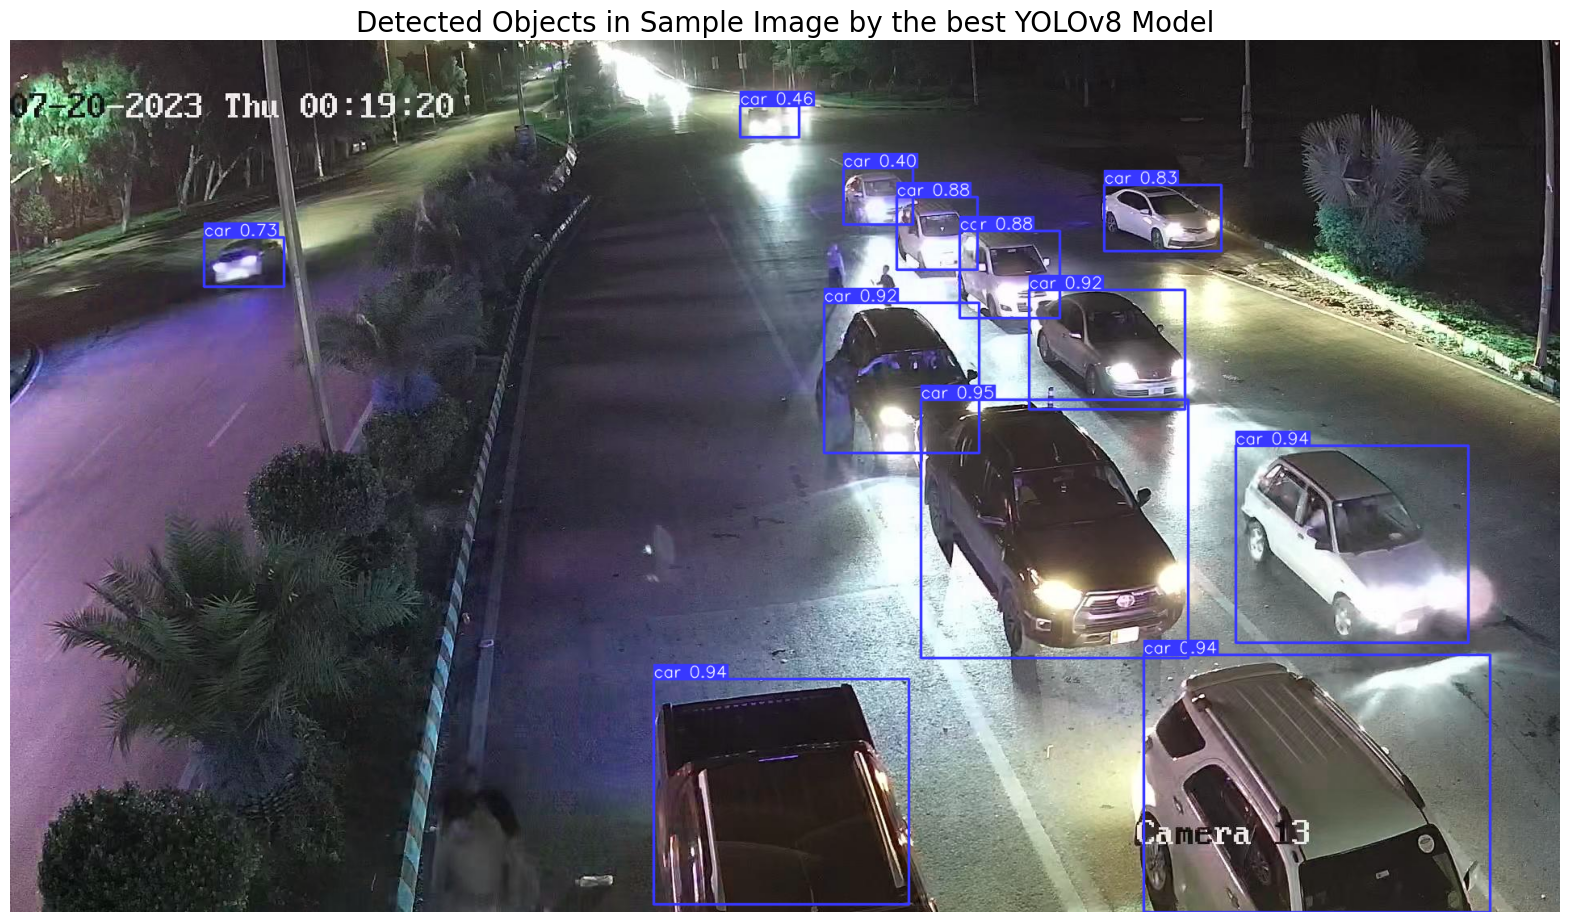

In [ ]:
TestImage = Image.open(open("/content/gdrive/MyDrive/Traffic.v5i.yolov8/test/images/img_2602_jpg.rf.4541c5658686e071e97e2060e095a762.jpg", 'rb'))
# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
TestImage = best_Con_model(TestImage)
# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(TestImage[0].plot(line_width=2))
plt.title('Detected Objects in Sample Image by the best YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
heavy_traffic_threshold = 10 #num of cars
# Define the positions for the text on the image
text_position = (10, 50)
intensity_position = (10, 100)

# Define font, scale, and colors for the annotations
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)    # White color for text
background_color = (0, 0, 255)  # Red background for text

In [ ]:
def Numcounter(img):
  processed_img = best_Con_model(img)
  img=processed_img[0].plot(line_width=2)
        # Retrieve the bounding boxes from the results
  bounding_boxes = processed_img[0].boxes
        # Initialize counters for vehicles in each lane
  number_of_vehicles = 0
          # Loop through each bounding box to count vehicles in each lane
  for box in bounding_boxes.xyxy:
    number_of_vehicles += 1

        # Determine the traffic density
  traffic_density = "Low" if number_of_vehicles < 9 else ("Medium" if number_of_vehicles <= 20 else "High")

        # Add a background rectangle for the vehicle count
  cv2.rectangle(img, (text_position[0]-10, text_position[1] - 25),
                      (text_position[0] + 460, text_position[1] + 10), background_color, -1)

        # Add the vehicle count text on top of the rectangle
  cv2.putText(img, f'Num of cars: {number_of_vehicles}', text_position,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Add a background rectangle for traffic intensity
  cv2.rectangle(img, (intensity_position[0]-10, intensity_position[1] - 25),
                      (intensity_position[0] + 460, intensity_position[1] + 10), background_color, -1)

        # Add the traffic intensity text on top of the rectangle
  cv2.putText(img, f'Traffic density: {traffic_density}', intensity_position,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

  from google.colab.patches import cv2_imshow
  cv2_imshow(img)


0: 128x224 22 cars, 26.6ms
Speed: 1.1ms preprocess, 26.6ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 224)


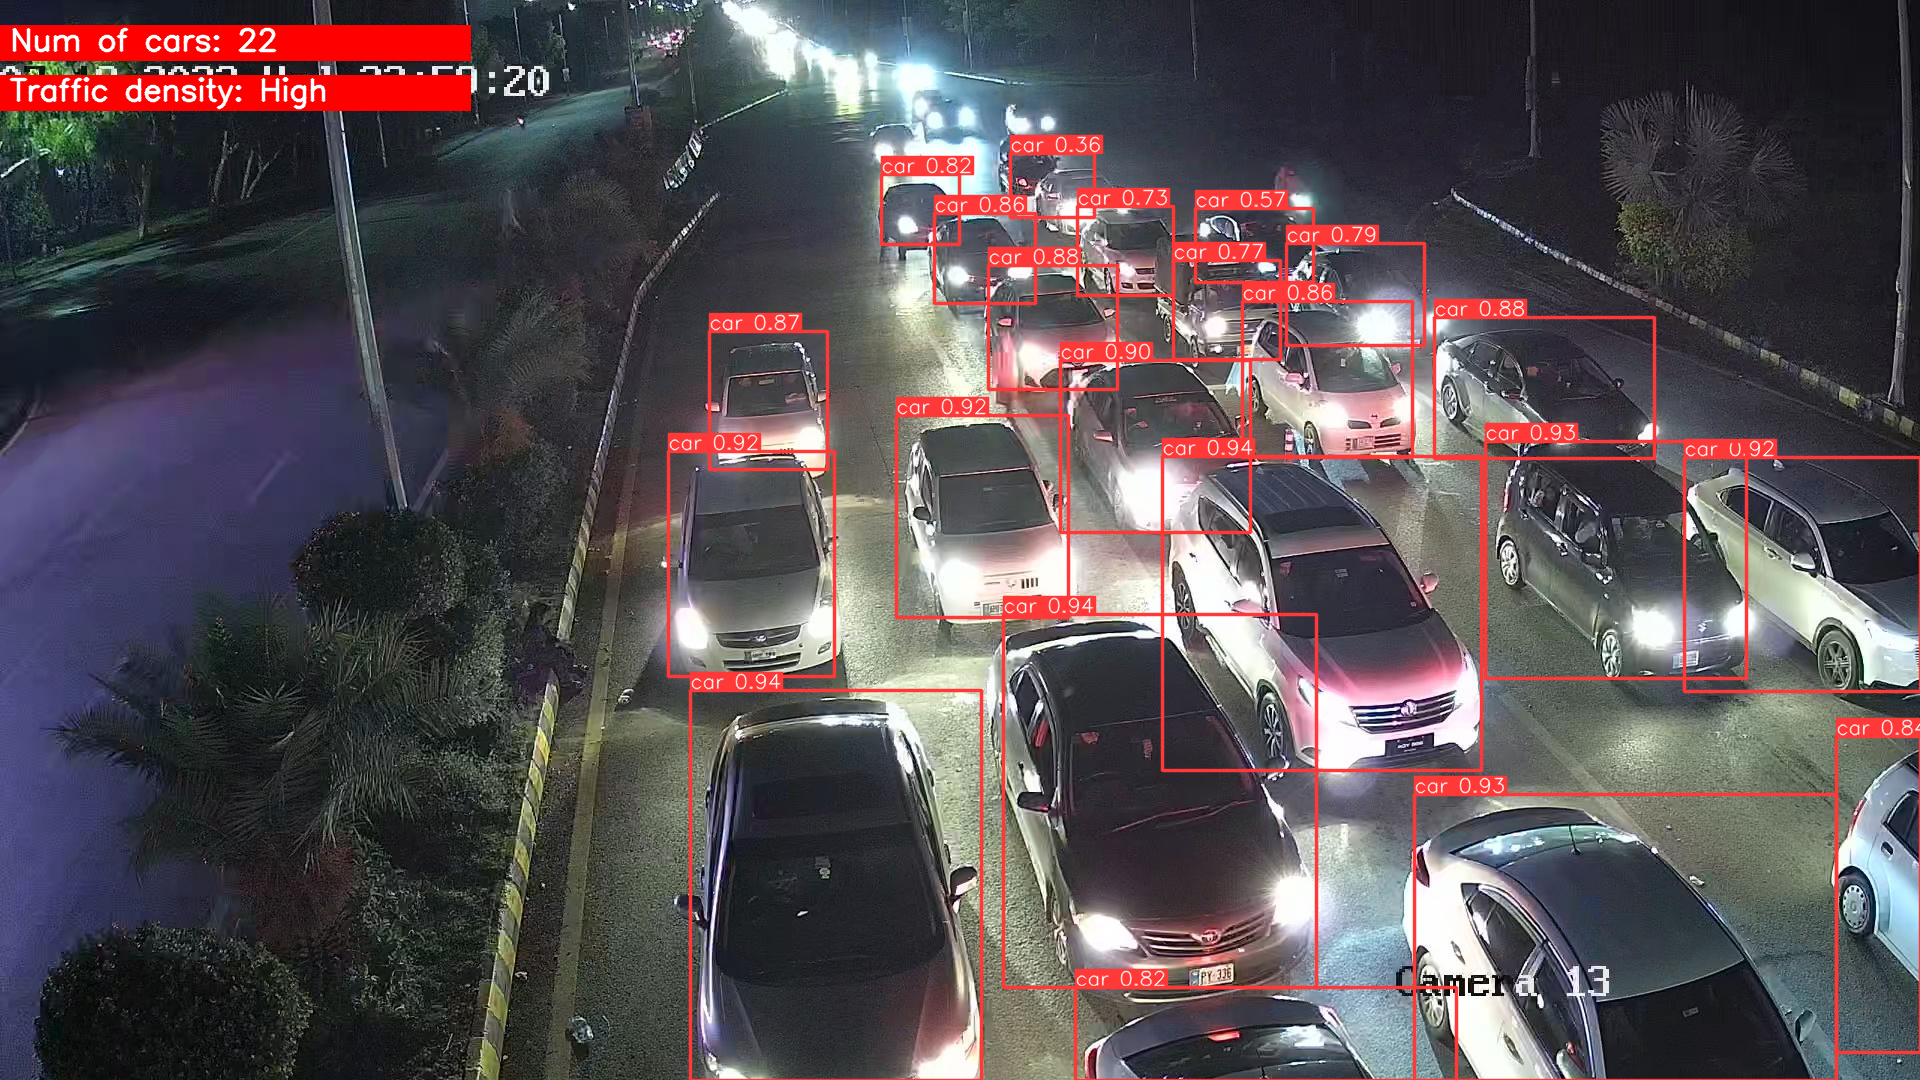

In [ ]:
image= Image.open(open("/content/gdrive/MyDrive/Traffic.v5i.yolov8/test/images/img_1161_jpg.rf.2af21dabaa6c9b92ad10719b99d04bb1.jpg", 'rb'))
# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
Numcounter(image)